In [111]:
import numpy as np
import pandas as pd
import sqlite3

import matplotlib.pyplot as plt
%matplotlib inline


In [112]:
def access_sql_db():
    # Connect to the SQLite database
    db_file = 'sales_data.db'
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # Query the data
    query = 'SELECT * FROM sales_data'
    df = pd.read_sql_query(query, conn)

    # Close the connection
    conn.close()

    # Display the database as  dataframe 
    return df

data = access_sql_db()
data.head(5)

,Retailers,Item Description,Brand,Packs Per Case,Week,Date,Year,Sales $,Sales U,Avg Sell Price,Retail,Store Count,In Stock,PPSPW,ProductLineDesc,ItemCode
0,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 1 (1),2022-02-12 00:00:00,2022,None,None,None,None,None,None,None,Tide Wipes Finished Good,80371541
1,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 1 (1),2022-02-12 00:00:00,2022,None,None,None,None,None,None,None,Tide Wipes Finished Good,814521012103
2,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 2 (2),2022-02-19 00:00:00,2022,None,None,None,None,None,None,None,Tide Wipes Finished Good,80371541
3,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 2 (2),2022-02-19 00:00:00,2022,None,None,None,None,None,None,None,Tide Wipes Finished Good,814521012103
4,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 3 (3),2022-02-26 00:00:00,2022,None,None,None,None,None,None,None,Tide Wipes Finished Good,80371541


In [113]:
# Getting the null counts and data types
null_counts = data.isnull().sum()
data_types = data.dtypes

# Combining them side by side
result = pd.concat([null_counts, data_types], axis=1)
result.columns = ['Null Counts', 'Data Types']

print(data.shape)
result

(57772, 16)


,Null Counts,Data Types
Retailers,0,object
Item Description,0,object
Brand,0,object
Packs Per Case,8684,float64
Week,0,object
Date,21215,object
Year,0,int64
Sales $,49833,object
Sales U,49695,object
Avg Sell Price,49976,object


In [114]:
# Columns to fill missing values
cols_to_fill = ['ItemCode', 'PPSPW', 'In Stock', 'Store Count', 'Retail', 'Avg Sell Price', 'Sales U', 'Sales $', 'Packs Per Case', ]

# Replace missing values with 0 in the specified columns
data[cols_to_fill] = data[cols_to_fill].fillna(0)

# Replace missing values with 'missing' in non numerical col "ProductLineDesc"

data['ProductLineDesc'] = data['ProductLineDesc'].fillna('missing')

# Remove rows with missing dates
data = data.dropna(subset=['Date']) 

C:\Users\mkmad\AppData\Local\Temp\ipykernel_28568\2749289647.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[cols_to_fill] = data[cols_to_fill].fillna(0)


In [115]:
# Convert numeric columns
numeric_columns = ['Packs Per Case', 'Year', 'Retail', 'Store Count', 'Avg Sell Price', 'In Stock', 'PPSPW', 'ItemCode']
data[numeric_columns] = data[numeric_columns].astype(float)

# Convert categorical columns
categorical_columns = ['Retailers', 'Item Description', 'Brand', 'Week', 'Date', 'Sales $', 'Sales U', 'ProductLineDesc']
data[categorical_columns] = data[categorical_columns].astype('category')

# Convert Date column to datetime
data['Date'] = pd.to_datetime(data['Date'])


## Converting these specific 2 col two into float, two handle specific characters and error
# Clean 'Sales $' column: remove '$' and ',' characters
data['Sales $'] = data['Sales $'].str.replace('-', '').replace('', np.nan)
data['Sales U'] = data['Sales U'].str.replace('-', '').replace('', np.nan)
# Convert 'Sales $' and 'Sales U' columns to numeric
numeric_columns = ['Sales $', 'Sales U']
data[numeric_columns] = data[numeric_columns].astype(float)

In [116]:
# Columns to fill missing values
cols_to_fill = ['ItemCode', 'PPSPW', 'In Stock', 'Store Count', 'Retail', 'Avg Sell Price', 'Sales U', 'Sales $', 'Packs Per Case', ]

# Replace missing values with 0 in the specified columns
data[cols_to_fill] = data[cols_to_fill].fillna(0)

# Replace missing values with 'missing' in non numerical col "ProductLineDesc"

data['ProductLineDesc'] = data['ProductLineDesc'].fillna('missing')

# Remove rows with missing dates
data = data.dropna(subset=['Date']) 

In [117]:
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes

Retailers           category
Item Description    category
Brand               category
Packs Per Case       float64
Week                category
Date                category
Year                 float64
Sales $              float64
Sales U              float64
Avg Sell Price       float64
Retail               float64
Store Count          float64
In Stock             float64
PPSPW                float64
ProductLineDesc     category
ItemCode             float64
dtype: object

In [118]:
data

,Retailers,Item Description,Brand,Packs Per Case,Week,Date,Year,Sales $,Sales U,Avg Sell Price,Retail,Store Count,In Stock,PPSPW,ProductLineDesc,ItemCode
0,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 1 (1),2022-02-12,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tide Wipes Finished Good,8.037154e+07
1,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 1 (1),2022-02-12,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tide Wipes Finished Good,8.145210e+11
2,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 2 (2),2022-02-19,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tide Wipes Finished Good,8.037154e+07
3,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 2 (2),2022-02-19,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tide Wipes Finished Good,8.145210e+11
4,kroger,tide to go wipes 12/10ct,Tide Wipes,12.0,PD 1 WK 3 (3),2022-02-26,2022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Tide Wipes Finished Good,8.037154e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57767,publix,tide wmc 6/3ctcrtns,Tide WMC,6.0,12 WK 1,2024-11-16,2024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.000000e+00
57768,publix,tide wmc 6/3ctcrtns,Tide WMC,6.0,12 WK 2,2024-11-23,2024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.000000e+00
57769,publix,tide wmc 6/3ctcrtns,Tide WMC,6.0,12 WK 3,2024-11-30,2024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.000000e+00
57770,publix,tide wmc 6/3ctcrtns,Tide WMC,6.0,12 WK 4,2024-12-07,2024.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.000000e+00


In [119]:
# Ensure correct data types
data['Date'] = pd.to_datetime(data['Date'])
data['Year'] = data['Year'].astype(int)

# Create time-based features
data['Week_of_Year'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month
data['Day_of_Week'] = data['Date'].dt.dayofweek

# Sort data by Date
data = data.sort_values(by='Date')

In [120]:
data.set_index('Date', inplace=True)


In [121]:
data['Sales $']

Date
2013-01-12    0.0
2013-01-12    0.0
2013-01-12    0.0
2013-01-12    0.0
2013-01-12    0.0
             ... 
2024-12-28    0.0
2024-12-28    0.0
2024-12-28    0.0
2024-12-28    0.0
2024-12-28    0.0
Name: Sales $, Length: 36557, dtype: float64

In [122]:
### Testing for stationarity

from statsmodels.tsa.stattools import adfuller

In [123]:
test_result = adfuller(data['Sales U'])

In [124]:
## H0 It is non stationary
## H1 It is stationary

def adfuller_test(Sales):
    result = adfuller(Sales)
    labels = ['ADF Test Statistic', 'p-value', '#Lags Used', "Number of Observation"]
    for value, label in zip(result, labels):
        print(label+':'+str(value))
    if result [1] <= 0.05:
        print('Strong evidence against the null hypothesis(H0), reject the null hypothesis')
    else:
        print('weak evidence against the null hypothesis')

In [125]:
adfuller_test(data['Sales $'])

ADF Test Statistic:-47.369782187290966
p-value:0.0
#Lags Used:12
Number of Observation:36544
Strong evidence against the null hypothesis(H0), reject the null hypothesis


In [126]:
adfuller_test(data['Sales U'])

ADF Test Statistic:-42.7353576753161
p-value:0.0
#Lags Used:15
Number of Observation:36541
Strong evidence against the null hypothesis(H0), reject the null hypothesis


Differencing

In [127]:
data['Sales $ Seasonal first diffrence'] = data['Sales $'] - data['Sales $'].shift(12)
data['Sales U Seasonal first diffrence'] = data['Sales U'] - data['Sales U'].shift(12)

In [128]:
data.head(15)

,Retailers,Item Description,Brand,Packs Per Case,Week,Year,Sales $,Sales U,Avg Sell Price,Retail,Store Count,In Stock,PPSPW,ProductLineDesc,ItemCode,Week_of_Year,Month,Day_of_Week,Sales $ Seasonal first diffrence,Sales U Seasonal first diffrence
Date,,,,,,,,,,,,,,,,,,,,
2013-01-12,publix,dwr- 12/16.9oz,DWR,12.0,01 WK 2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.0,2,1,5,NaN,NaN
2013-01-12,publix,dreft-12/22oz fabricrefresher,DREFT,0.0,01 WK 2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.0,2,1,5,NaN,NaN
2013-01-12,publix,dreft- multi surf 70 ct wipe c,DREFT,0.0,01 WK 2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.0,2,1,5,NaN,NaN
2013-01-12,publix,boogie blasters- berry 24 pk,Boogie Wipes,0.0,01 WK 2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.0,2,1,5,NaN,NaN
2013-01-12,publix,dreft- pretreater stainpen,DREFT,0.0,01 WK 2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.0,2,1,5,NaN,NaN
2013-01-12,publix,dreft- multisurface cleaner wi,DREFT,0.0,01 WK 2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.0,2,1,5,NaN,NaN
2013-01-12,publix,boogie 3x 3-30ct grape-bag,Boogie Wipes,0.0,01 WK 2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.0,2,1,5,NaN,NaN
2013-01-12,publix,dreft- 12/4oz stain remover,DREFT,0.0,01 WK 2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.0,2,1,5,NaN,NaN
2013-01-12,publix,dreft 12/22oz stainremover,DREFT,0.0,01 WK 2,2013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,missing,0.0,2,1,5,NaN,NaN


In [129]:
adfuller_test(data['Sales $ Seasonal first diffrence'].dropna())
adfuller_test(data['Sales U Seasonal first diffrence'].dropna())

ADF Test Statistic:-45.099130951159296
p-value:0.0
#Lags Used:50
Number of Observation:36494
Strong evidence against the null hypothesis(H0), reject the null hypothesis
ADF Test Statistic:-49.05611731599846
p-value:0.0
#Lags Used:47
Number of Observation:36497
Strong evidence against the null hypothesis(H0), reject the null hypothesis


<Axes: xlabel='Date'>

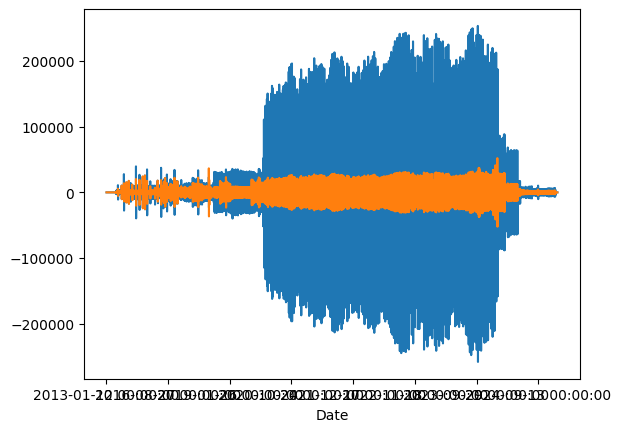

In [130]:
data['Sales $ Seasonal first diffrence'].plot()
data['Sales U Seasonal first diffrence'].plot()

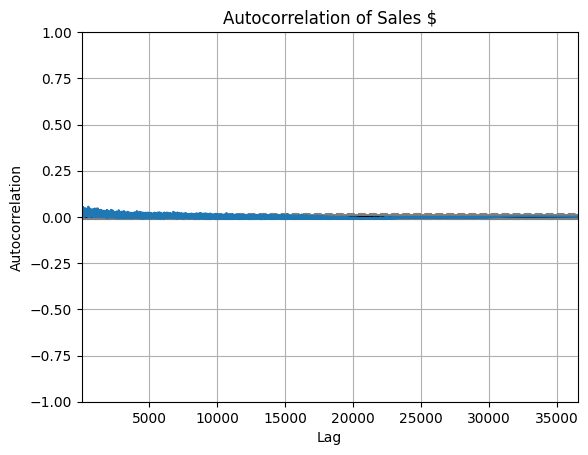

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot

# Assuming your data is in a DataFrame called data with a DateTime index
# and a 'Sales $' column


# Plot autocorrelation
autocorrelation_plot(data['Sales $'])
plt.title('Autocorrelation of Sales $')
plt.show()


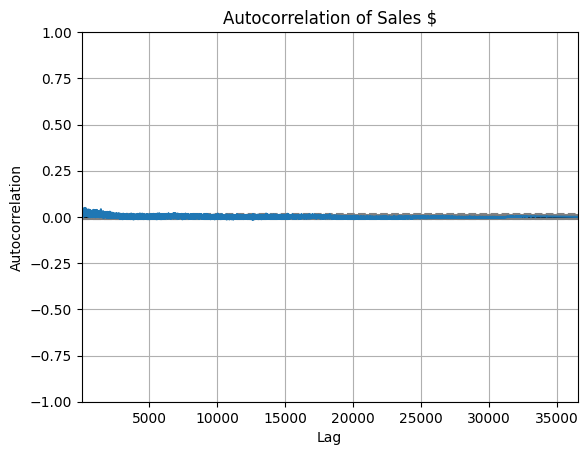

In [132]:
# Plot autocorrelation
autocorrelation_plot(data["Sales U"])
plt.title('Autocorrelation of Sales $')
plt.show()

In [133]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

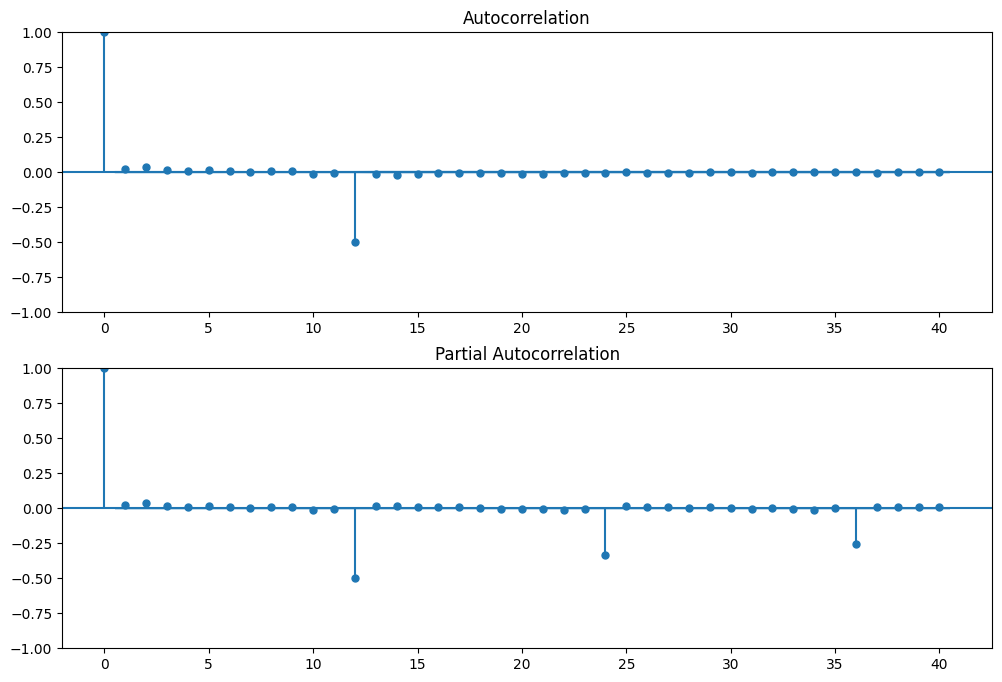

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Sales $ Seasonal first diffrence'].iloc[13:],lags = 40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Sales $ Seasonal first diffrence'].iloc[13:], lags = 40, ax = ax2)


In [137]:
# for non-seasonal data
# P = 1, d = 1, q = 0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [139]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA


# Fit the ARIMA model
model = ARIMA(data['Sales $'], order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


C:\Users\mkmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mkmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mkmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Sales $   No. Observations:                36557
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -405440.326
Date:                Mon, 10 Jun 2024   AIC                         810886.652
Time:                        17:24:04   BIC                         810912.172
Sample:                             0   HQIC                        810894.764
                              - 36557                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0251      0.005      5.443      0.000       0.016       0.034
ma.L1         -0.9982      0.000  -2590.987      0.000      -0.999      -0.997
sigma2      2.517e+08   4.93e-12    5.1e+19      0.0

This model is useless as it is seosinal data

C:\Users\mkmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mkmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mkmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g

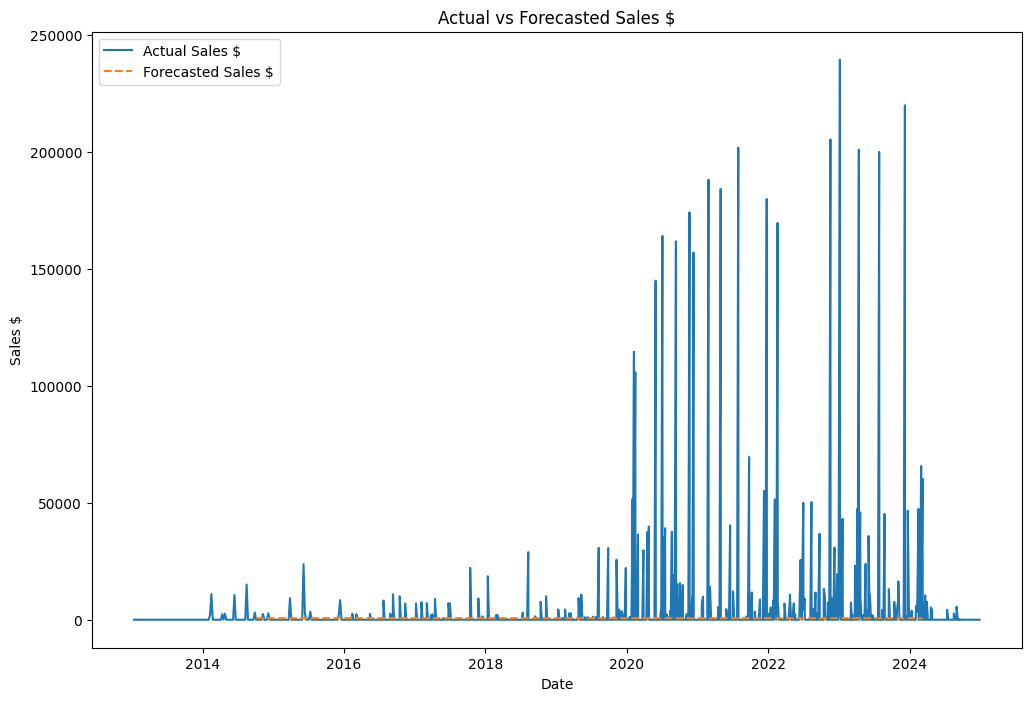

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Ensure your data's index is a DateTime index
data.index = pd.to_datetime(data.index)

# Check for duplicate index labels and remove them
duplicates = data.index.duplicated()
if duplicates.any():
    print("Duplicate index labels found and removed:")
    print(data[duplicates])
    data = data[~data.index.duplicated(keep='first')]

# Fit the ARIMA model
model = ARIMA(data['Sales $'], order=(1, 1, 1))
model_fit = model.fit()

# Ensure the start and end indices for prediction are within the valid range
start = 90
end = 1003

if start < 0 or end >= len(data):
    raise ValueError(f"Start and end indices must be within the range of the DataFrame's index. Max index is {len(data) - 1}.")

# Forecast values
data['forecast'] = model_fit.predict(start=start, end=end, dynamic=True)

# Plot the actual vs forecasted values
plt.figure(figsize=(12, 8))
plt.plot(data['Sales $'], label='Actual Sales $')
plt.plot(data['forecast'], label='Forecasted Sales $', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales $')
plt.title('Actual vs Forecasted Sales $')
plt.legend()
plt.show()


In [146]:
import statsmodels.api as sm

SARIMA model

In [151]:
model = sm.tsa.statespace.SARIMAX(data['Sales $'], order = (1,1,1),seasonal_order=(1,1,1,12))
results = model.fit()

C:\Users\mkmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\mkmad\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

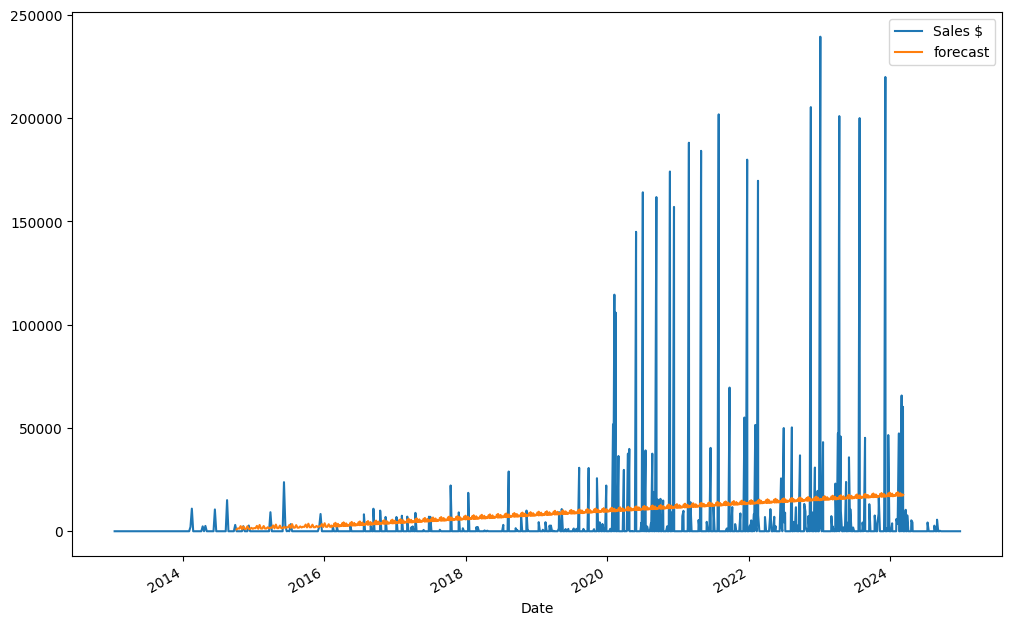

In [155]:
data['forecast'] = results.predict(start=90, end = 1003, dynamic=True)
data[['Sales $', 'forecast']].plot(figsize=(12,8))